# CNRR reanalysis data for the Tibetan Plateau region 

In [2]:
# Import a range of python libraries used in this notebook:
import iris
import numpy as np
import pandas as pd
import os,sys
import matplotlib.pyplot as plt
import iris.plot as iplt
import iris.quickplot as qplt
import urllib,zipfile
import datetime
from netCDF4 import Dataset
%matplotlib inline
import tobac

##  Analysis possible for parameters:


for background conditions 


-  uwd, vwd
-  water vapor mixing ratio 



for tracking 

-  CNRR GSISAT hourly surface rain rates 

In [4]:
path='/media/juli/Data/third_pole/CNRR/data/'
file= 'cnrr_cnrr_199701_TP.nc4.nc4'
file = 'substring.nc4'
ds = Dataset(path + file)
print(path+file)

/media/juli/Data/third_pole/CNRR/data/substring.nc4


In [5]:
# read in lats and lons information to add to the iris cubes 
precip = np.array(ds['prcp'])
lats = np.array(ds['LAT'])
lons = np.array(ds['LON'])

In [6]:
Precip = iris.load_cube(path+file, "prcp")

In [7]:
import iris.coords
## ad 2d lats and lons with aux coords 
aux_lats = iris.coords.AuxCoord(lats, standard_name='latitude', long_name='latitude')
aux_lons = iris.coords.AuxCoord(lons, standard_name='longitude', long_name='longitude')
Precip.add_aux_coord(aux_lats, [1,2])
Precip.add_aux_coord(aux_lons, [1,2])

In [8]:
coord_lats = iris.coords.DimCoord(lats[:,0], standard_name='latitude', long_name='lats', var_name='lats' )
coord_lons = iris.coords.DimCoord(lons[0,:], standard_name='longitude', long_name='lons', var_name='lons')
#Precip.add_dim_coord(coord_lats, 1)
#Precip.add_dim_coord(coord_lons, 2)

In [6]:
Precip

<iris 'Cube' of prcp / (mm/hr) (time: 720; -- : 141; -- : 201)>

In [9]:

dxy,dt=tobac.get_spacings(Precip, grid_spacing = 18000.0) # grid spacing needs to be given as input! 

Available coordinates:     ['time', 'latitude', 'longitude']


# Test run on simple example 

## Feature detection 

In [20]:
# Dictionary containing keyword options (could also be directly given to the function)
parameters_features={}
parameters_features['position_threshold']='weighted_diff' # diff between specific value and threshold for weighting when finding the center location (instead of just mean lon/lat)
parameters_features['min_num']=3 #? 
parameters_features['min_distance']=0 # minimum distance between features 

parameters_features['sigma_threshold']=0.5 # for slightly smoothing (gaussian filter)
parameters_features['n_erosion_threshold']=0 # pixel erosion (for more robust results)

parameters_features['threshold']=[1,2,3,4,5,7,10,15] #mm/h, step-wise threshold for feature detection 
parameters_features['n_min_threshold']=10 # minimum nr of contiguous pixels for thresholds, 10 pixels = ca. 2000 km2



In [11]:
# Feature detection based on based on surface precipitation field and a range of thresholds
print('starting feature detection based on multiple thresholds')
Features=tobac.feature_detection_multithreshold(Precip,dxy,**parameters_features)
print('feature detection done')

starting feature detection based on multiple thresholds


KeyboardInterrupt: 

In [3]:
#Set up directory to save output and plots:
savedir='Save'
os.makedirs(savedir,exist_ok=True)
plot_dir="Plot"
os.makedirs(plot_dir,exist_ok=True)
#Features.to_hdf(os.path.join(savedir,'Features.h5'),'table')
print('features saved')

features saved


## Segmentation

In [15]:
# Dictionary containing keyword arguments for segmentation step:
parameters_segmentation={}
parameters_segmentation['method']='watershed'
parameters_segmentation['threshold']=1 

In [309]:
# Perform Segmentation and save resulting mask to NetCDF file:
print('Starting segmentation based on surface precipitation')
Mask,Features_Precip=tobac.segmentation_2D(Features,Precip,dxy,**parameters_segmentation)
print('segmentation based on surface precipitation performed, start saving results to files')
iris.save([Mask],os.path.join(savedir,'Mask_Segmentation_precip.nc'),zlib=True,complevel=4)                
Features_Precip.to_hdf(os.path.join(savedir,'Features_Precip.h5'),'table')
print('segmentation surface precipitation performed and saved')







Starting segmentation based on surface precipitation
segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved


In [339]:
timestamp = Track.loc[Track['timestr'] == '1997-11-01 05:00:00']
np.unique(timestamp.cell)
timestamp.loc[timestamp['ncells']== 0]

frame  idx      hdim_1      hdim_2  num  threshold_value  feature  \
623      5   21   12.544383  466.164733   22                1      624   
625      5   37   16.586003  175.559809   15                1      626   
639      5  187   77.035841  470.141299   36                1      640   
641      5  199   79.838488  449.537637   14                1      642   
645      5  233   99.771534  438.638584   33                1      646   
646      5  239   98.808872  445.967155   70                1      647   
647      5  243   96.267986  466.876289   11                1      648   
650      5  278  126.068404   50.745161   44                1      651   
654      5  316  157.849041  120.213399   19                1      655   
678      5  161  102.869278   11.113898   12                2      679   
710      5   25   24.058094   91.885484   13                7      711   

                    time              timestr  ncells   cell time_cell  
623  1997-11-01 05:00:00  1997-11-01 05:00:00       0    NaN       NaT  
625  1997-11-01 05:00:00  1997-11-01 05:00:00       0  307.0  00:00:00  
639  1997-11-01 05:00:00  1997-11-01 05:00:00       0   60.0  05:00:00  
641  1997-11-01 05:00:00  1997-11-01 05:00:00       0  235.0  02:00:00  
645  1997-11-01 05:00:00  1997-11-01 05:00:00       0    NaN       NaT  
646  1997-11-01 05:00:00  1997-11-01 05:00:00       0  276.0  01:00:00  
647  1997-11-01 05:00:00  1997-11-01 05:00:00       0    NaN       NaT  
650  1997-11-01 05:00:00  1997-11-01 05:00:00       0  280.0  01:00:00  
654  1997-11-01 05:00:00  1997-11-01 05:00:00       0  242.0  02:00:00  
678  1997-11-01 05:00:00  1997-11-01 05:00:00       0  323.0  00:00:00  
710  1997-11-01 05:00:00  1997-11-01 05:00:00       0   53.0  05:00:00

# Tracking

In [8]:
# Dictionary containing keyword arguments for the linking step:
parameters_linking={}

parameters_linking['adaptive_stop']=0.2
parameters_linking['adaptive_step']=0.95
parameters_linking['extrapolate']=0
parameters_linking['order']=1
parameters_linking['subnetwork_size']= 100 # maximum size of subnetwork used for linking 
parameters_linking['memory']=0
#parameters_linking['time_cell_min']=5*60
parameters_linking['time_cell_min']= 3*dt 
parameters_linking['method_linking']='predict'
#parameters_linking['method_detection']='threshold'
parameters_linking['v_max']= 10
#parameters_linking['d_min']=2000
parameters_linking['d_min']=2*dxy # four times the grid spacing  (! seems to be important for GPM data)

In [536]:
# Perform trajectory linking using trackpy and save the resulting DataFrame:
Track=tobac.linking_trackpy(Features,Precip,dt=dt,dxy=dxy,**parameters_linking)
Track.to_hdf(os.path.join(savedir,'Track1.h5'),'table')


Frame 719: 109 trajectories present.


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


# Chunking 

In [10]:
# get list with all files by month
import glob
file_list= glob.glob('/media/juli/Data/third_pole/CNRR/data/*TP*.nc4')  
print('files in dataset:  ', len(file_list))


files in dataset:   240


In [23]:
for file in file_list:
    
    i = file[48:54]
    
    if glob.glob('/media/juli/Data/third_pole/mcs_tracking/CNRR/Save/Features*' + str(i) + '*.h5'):
        print('file already processed.')

    else:    
        print('start process for file.....', file)
        ## DATA PREPARATION
        Precip=iris.load_cube(file,'prcp')

        ## ad 2d lats and lons with aux coords 
        import iris.coords
        aux_lats = iris.coords.AuxCoord(lats, standard_name='latitude', long_name='latitude')
        aux_lons = iris.coords.AuxCoord(lons, standard_name='longitude', long_name='longitude')
        Precip.add_aux_coord(aux_lats, [1,2])
        Precip.add_aux_coord(aux_lons, [1,2])

        # FEATURE DETECTION
        print('starting feature detection based on multiple thresholds')
        Features=tobac.feature_detection_multithreshold(Precip,dxy,**parameters_features)
        print('feature detection done')
        Features.to_hdf(os.path.join(savedir,'Features_CNRR_' + str(i) + '.h5'),'table')
        print('features saved')

        # SEGMENTATION 
        print('Starting segmentation based on surface precipitation')
        Mask,Features_Precip=tobac.segmentation_2D(Features,Precip,dxy,**parameters_segmentation)
        print('segmentation based on surface precipitation performed, start saving results to files')
        iris.save([Mask],os.path.join(savedir,'Mask_Segmentation_CNRR_' + str(i) + '.nc'),zlib=True,complevel=4)                
        Features_Precip.to_hdf(os.path.join(savedir,'Features_Precip_CNRR_' + str(i) + '.h5'),'table')
        print('segmentation surface precipitation performed and saved')

file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already processed.
file already pro

/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200002_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200003_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200004_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200005_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200006_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200007_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200008_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200009_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200010_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200011_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200012_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200101_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200206_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200207_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200208_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200209_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200210_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200211_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200212_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200301_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


features saved
Starting segmentation based on surface precipitation
segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200302_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


features saved
Starting segmentation based on surface precipitation
segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200303_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200304_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200305_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200306_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


features saved
Starting segmentation based on surface precipitation
segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200307_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_201309_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_201310_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_201311_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_201312_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_201401_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_201402_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_201403_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_201404_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_201405_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_201406_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_201407_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_201408_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_201409_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_201410_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199809_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199810_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199811_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199812_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199901_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199902_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199903_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199904_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199905_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199906_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199907_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199908_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199909_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199910_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200809_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200810_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200811_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200812_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200901_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200902_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200903_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200904_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200905_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200906_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200907_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200908_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200909_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_200910_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199706_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199707_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199708_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199709_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199710_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199711_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199712_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199801_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199802_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199803_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199804_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199805_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199806_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved
start process for file..... /media/juli/Data/third_pole/CNRR/data/cnrr_cnrr_199807_TP.nc4.nc4
starting feature detection based on multiple thresholds
feature detection done
features saved
Starting segmentation based on surface precipitation


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


segmentation based on surface precipitation performed, start saving results to files
segmentation surface precipitation performed and saved


# Recombination and tracking on entire dataset

In [35]:
file = '/Features201607.h5'
#file= '/Featurescnrr_cnrr_201607_TP.nc4.nc4.h5'
file= '/Features_CNRR_201607.h5'
#file= '/Features_Precip201607.h5'

In [36]:
features_example = pd.read_hdf(savedir+ file, 'table')

In [4]:
import glob
# read in HDF5 files with saved features
file_list= glob.glob(savedir  + '/Features_CNRR_??????.h5')  
#len(file_list)
#file_list

In [5]:
i = 0 
for file in file_list: 
    if i == 0:
        print(file)
        features_p = pd.read_hdf(file, 'table')
        Features = features_p
        i +=1
        end_frame =  np.max(features_p['frame'])
    else:
        print(file, end_frame)
        features = pd.read_hdf(file, 'table')
        # update frame number and make sure they are sequential! 
        features['frame'] = features['frame']  + end_frame
        # append dataframes 
        Features = Features.append(features, ignore_index=True)
        # update last number in frame 
        end_frame = np.max(features['frame'])
        i +=1 
        print(Features.shape)


Save/Features_CNRR_200109.h5
Save/Features_CNRR_200110.h5 719
(18665, 12)
Save/Features_CNRR_200111.h5 1462
(20706, 12)
Save/Features_CNRR_200112.h5 2181
(21921, 12)
Save/Features_CNRR_200201.h5 2924
(24473, 12)
Save/Features_CNRR_200202.h5 3667
(27709, 12)
Save/Features_CNRR_200203.h5 4338
(32448, 12)
Save/Features_CNRR_200204.h5 5081
(40060, 12)
Save/Features_CNRR_200205.h5 5800
(50280, 12)
Save/Features_CNRR_200206.h5 6543


/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


(65453, 12)
Save/Features_CNRR_200207.h5 7262
(81511, 12)
Save/Features_CNRR_200208.h5 8005
(99209, 12)
Save/Features_CNRR_200209.h5 8748
(112227, 12)
Save/Features_CNRR_200210.h5 9467
(117508, 12)
Save/Features_CNRR_200211.h5 10210
(119712, 12)
Save/Features_CNRR_200212.h5 10927
(121833, 12)
Save/Features_CNRR_200301.h5 11670
(123474, 12)
Save/Features_CNRR_200302.h5 12413
(128207, 12)
Save/Features_CNRR_200303.h5 13084
(133923, 12)
Save/Features_CNRR_200304.h5 13827
(141072, 12)
Save/Features_CNRR_200305.h5 14546
(150585, 12)
Save/Features_CNRR_200306.h5 15289
(168081, 12)
Save/Features_CNRR_200307.h5 16008
(191117, 12)
Save/Features_CNRR_200308.h5 16751
(211097, 12)
Save/Features_CNRR_200309.h5 17494
(226708, 12)
Save/Features_CNRR_200310.h5 18213
(232850, 12)
Save/Features_CNRR_200311.h5 18956
(234997, 12)
Save/Features_CNRR_200312.h5 19666
(236942, 12)
Save/Features_CNRR_200401.h5 20409
(239970, 12)
Save/Features_CNRR_199901.h5 21152
(241861, 12)
Save/Features_CNRR_200005.h5 21894

(1432455, 12)
Save/Features_CNRR_199703.h5 131214
(1438249, 12)
Save/Features_CNRR_199704.h5 131957
(1445070, 12)
Save/Features_CNRR_199705.h5 132676
(1454224, 12)
Save/Features_CNRR_199706.h5 133419
(1468916, 12)
Save/Features_CNRR_199707.h5 134138
(1488376, 12)
Save/Features_CNRR_199708.h5 134881
(1503650, 12)
Save/Features_CNRR_199709.h5 135624
(1516182, 12)
Save/Features_CNRR_199710.h5 136343
(1521117, 12)
Save/Features_CNRR_199711.h5 137083
(1524008, 12)
Save/Features_CNRR_199712.h5 137802
(1527129, 12)
Save/Features_CNRR_199801.h5 138535
(1529780, 12)
Save/Features_CNRR_199802.h5 139278
(1533719, 12)
Save/Features_CNRR_199803.h5 139949
(1539455, 12)
Save/Features_CNRR_199804.h5 140692
(1546674, 12)
Save/Features_CNRR_199805.h5 141411
(1556059, 12)
Save/Features_CNRR_199806.h5 142154
(1570261, 12)
Save/Features_CNRR_199807.h5 142873
(1590627, 12)
Save/Features_CNRR_199808.h5 143616
(1609451, 12)
Save/Features_CNRR_199809.h5 144359
(1620226, 12)
Save/Features_CNRR_199810.h5 145078


In [16]:
Features.shape

(1925377, 12)

In [ ]:
Track=tobac.linking_trackpy(Features,Precip,dt=dt,dxy=dxy,**parameters_linking)
# remove NaN tracks from feature space!!
Track = Track.loc[Track.cell > 0]
Track.to_hdf(os.path.join(savedir,'Tracks_CNRR_1997-2016.h5'),'table')

Frame 3215: 8 trajectories present.


# TODO

- look at basic patterns (to choose right parameters)

- clean notebook 

- statistical analysis of tracks and precipitation features

# Reading in calculated Tracks

In [3]:
file = savedir + '/Tracks_CNRR_2014-2016.h5'
#file = savedir + '/Tracks_CNRR_2006_2016.h5'
Track = pd.read_hdf(file, 'table')

In [9]:
Track

feature  frame      hdim_1      hdim_2  idx   latitude  longitude  \
0              1      1   92.338647   48.926314    5  34.076477  75.594613   
5              6      2   92.242745   48.954977    4  34.064809  75.608626   
8              9      3   91.856059   49.146974    3  34.023644  75.678463   
11            12      4   91.064097   49.426967    3  33.930453  75.801382   
26            27     10   96.673157    7.503000    4  31.209634  68.248763   
27            28     10  113.080480    9.745536   12  33.639282  66.833874   
28            29     10   93.524838   42.578681    1  33.747654  74.378729   
30            31     11  113.740251   10.404047   12  33.789815  66.867365   
31            32     11   96.413105    8.884023    3  31.297915  68.495544   
32            33     11   93.327510   42.746192    1  33.732688  74.426575   
33            34     11   98.718888   48.615793    2  34.976020  74.932849   
34            35     12  115.008272   10.831349   12  34.001385  66.795045   
35            36     12   96.387973   10.448777    4  31.433930  68.747911   
36            37     12   93.400772   42.723677    1  33.741412  74.415662   
37            38     12   98.736578   47.911520    4  34.922806  74.806865   
39            40     13  114.995769   10.713869   12  33.988743  66.777266   
40            41     13   96.533332   11.599522    4  31.555984  68.917078   
42            43     13   93.696873   42.702357    1  33.782229  74.383575   
43            44     13   98.844685   47.879453    3  34.935884  74.790768   
44            45     14   96.826053   12.995678    3  31.719706  69.111023   
45            46     14  114.618369   10.641452    8  33.930862  66.807750   
46            47     14   98.711351   48.044282    4  34.929695  74.832702   
47            48     15   96.431450   14.763337    4  31.821374  69.437242   
49            50     15  105.567158   39.794314    7  35.243755  72.704533   
50            51     15   97.267505   47.627425    3  34.687954  74.898613   
51            52     16   96.716807   16.353360    3  32.000111  69.665487   
52            53     16  106.071450   41.630515    6  35.468065  72.974646   
54            55     16   94.412482   48.054571    2  34.308756  75.246318   
56            57     17   97.455397   18.086844    4  32.253558  69.871540   
57            58     17  107.018783   34.012102    6  34.963058  71.552439   
...          ...    ...         ...         ...  ...        ...        ...   
1047573     1502  96168  134.006666  100.028390    7  44.048568  81.510825   
1047578     1507  96195    3.359942  116.623326    1  24.753977  93.401974   
1047579     1508  96195   10.043071  127.566868    4  26.222168  94.955676   
1047580     1509  96195   40.551688   77.836229   11  28.408906  84.742248   
1047581     1510  96196   10.678667  128.542382    5  26.358428  95.095509   
1047583     1512  96196   41.884419   76.380492   16  28.521064  84.404622   
1047584     1513  96196    4.063901  117.020005    1  24.877702  93.435849   
1047585     1514  96197   41.827197   76.369576   12  28.511872  84.406667   
1047588     1517  96197   55.763831   64.750569   18  29.851088  81.425380   
1047589     1518  96197   11.669888  129.136192    3  26.534596  95.154532   
1047591     1520  96197    4.972344  118.363562    2  25.072183  93.619597   
1047592     1521  96198   41.961788   77.854063   13  28.620682  84.649960   
1047595     1524  96198   55.753088   65.258863   24  29.882946  81.512841   
1047597     1526  96198    6.257568  119.891989    2  25.331728  93.818266   
1047598     1527  96198   12.440369  129.933077    3  26.684674  95.258604   
1047599     1528  96199    5.366553  119.509916    1  25.179898  93.794540   
1047600     1529  96199   12.792669  131.701332    3  26.807428  95.549622   
1047602     1531  96199   55.727551   64.666968   21  29.840215  81.413897   
1047603     1532  96199   36.237406   81.277970   12  27.964767  85.612258   
1047604     1533  96200    5.03

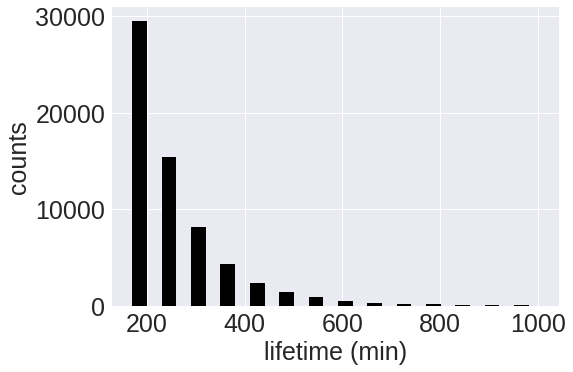

In [8]:
# Lifetimes of tracked features:

plt.style.use('seaborn')
plt.rcParams.update({'font.size': 25,
                     'xtick.labelsize' : 25,
                     'ytick.labelsize' : 25})


fig_lifetime,ax_lifetime= plt.subplots()
tobac.plot_lifetime_histogram_bar(Track,axes=ax_lifetime,bin_edges=np.arange(180,1000,10),density=False,width_bar = 30, color='k')
ax_lifetime.set_xlabel('lifetime (min)', fontsize = '25')
ax_lifetime.set_ylabel('counts', fontsize = '25')


# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/lifetime_CNRR_2006-2016.png')

In [17]:
# Distribution over travel speeds:

plt.style.use('seaborn')
plt.rcParams.update({'font.size': 25,
                     'xtick.labelsize' : 25,
                     'ytick.labelsize' : 25})


heights, bins = tobac.velocity_histogram(Track, bin_edges=np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
           17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), density=False, method_distance=None, return_values=False)

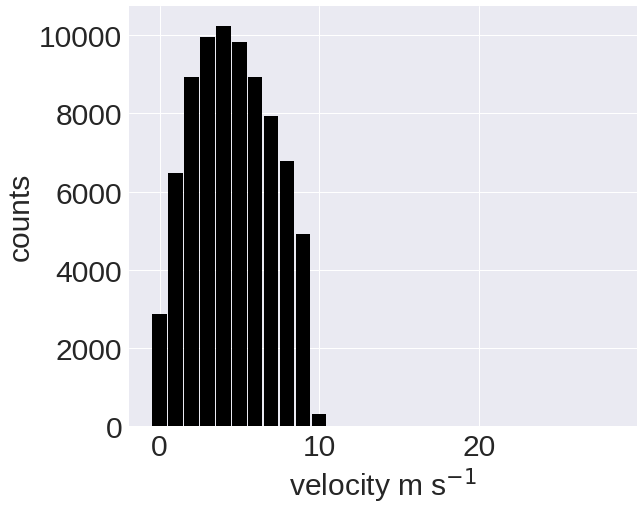

In [18]:
plt.style.use('seaborn')
plt.rcParams.update({'font.size': 30,
             'xtick.labelsize' : 30,
             'ytick.labelsize' : 30})
plt.figure(figsize=(20, 17))

plt.subplot(2,2,1)
plt.bar(bins[:-1], heights, width = 0.9, color='k')
plt.ylabel('counts', fontsize= 30)
plt.xlabel('velocity m s$^{-1}$', fontsize= 30)

#plt.plot(bins[:-1], heights)


# save figure to image file 
plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/hist_velocity_CNRR.png')

In [36]:
durations= []
cells = []
for c in np.unique(Track.cell):
    duration= (np.shape(Track.loc[Track.cell == c ])[0])
    if duration > 6:
        durations.append(duration)
        cells.append(c)

In [56]:
durations= np.array(durations)
durations = np.flip(np.sort(durations), axis =0 )
strongest = durations[0:1000]

cells = np.flip(np.sort(cells), axis =0 )
strongest_cells = cells[0:1000]


In [57]:
i = 0 
for c in strongest_cells:
    if i == 0:
        df= Track.loc[Track.cell == c ]
        i+=1 
    else:
        df= df.append(Track.loc[Track.cell == c ])

In [26]:
a = [] 
for c in np.unique(Track.cell):
    a.append(np.shape(Track.loc[Track['cell'] == c ])[0])

In [54]:
np.min(strongest)

14

In [ ]:
subset= df

In [ ]:
import cartopy.crs as ccrs
from cartopy.feature import ShapelyFeature
from cartopy.io.shapereader import Reader



shpfilename= '/media/juli/Data/master_thesis/Master_thesis/data/DBATP/DBATP'
#reader = shpreader.Reader(shpfilename)

shape_feature = ShapelyFeature(Reader(shpfilename).geometries(),
                                ccrs.PlateCarree(),facecolor='none', edgecolor='black' , linewidth = 2.0)

axis_extent= [70, 110, 25.0, 45 ]

# Plot map with all individual tracks:
import tobac
import cartopy.crs as ccrs
fig_map,ax_map=plt.subplots(figsize=(20,20),subplot_kw={'projection': ccrs.PlateCarree()})
ax_map=tobac.map_tracks(Track,axis_extent = axis_extent, axes=ax_map)

# Plot TP boundary polyline from shapefile 
#ax_map.add_feature(shape_feature)
plt.ylabel('Lat', fontsize= '25')
plt.xlabel('Lon', fontsize= '25')

plt.savefig('/media/juli/Data/third_pole/mcs_tracking/tobac_plots/tracks_TP_CNRR_longest_projection.png')





In [373]:
arr = np.array(a)
idx = np.where(arr == 159 )[0]
arr2 = np.unique(Track.cell)
index = arr2[idx]

array([1190])

In [381]:
track1 = Track.loc[Track['cell']== 2108.0] 

## Plotting

In [539]:
# Set extent of maps created in the following cells:
axis_extent=[70,105,27,45] 

FileNotFoundError: [Errno 2] No such file or directory: 'SavePlot/tracks_TP.png'

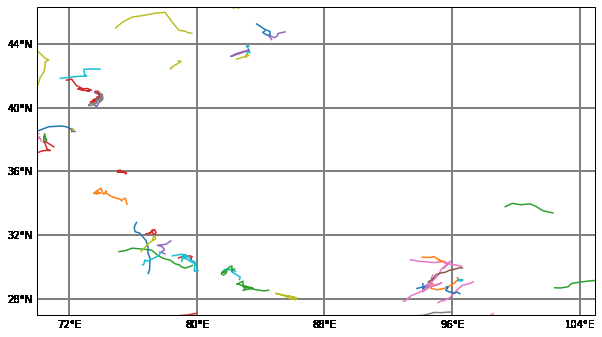

In [542]:
# Plot map with all individual tracks:
import cartopy.crs as ccrs
fig_map,ax_map=plt.subplots(figsize=(10,10),subplot_kw={'projection': ccrs.PlateCarree()})
ax_map=tobac.map_tracks(Track,axis_extent=axis_extent,axes=ax_map)

In [547]:
plt.savefig(plot_dir+ '/tracks_TP.png')

<Figure size 432x288 with 0 Axes>

In [23]:
print(np.shape(lats), np.shape(lons), np.shape(precip))

(360, 480) (360, 480) (744, 360, 480)


In [60]:
from iris.cube import Cube
help(Cube.add_aux_coord)

Help on function add_aux_coord in module iris.cube:

add_aux_coord(self, coord, data_dims=None)
    Adds a CF auxiliary coordinate to the cube.
    
    Args:
    
    * coord
        The :class:`iris.coords.DimCoord` or :class:`iris.coords.AuxCoord`
        instance to add to the cube.
    
    Kwargs:
    
    * data_dims
        Integer or iterable of integers giving the data dimensions spanned
        by the coordinate.
    
    Raises a ValueError if a coordinate with identical metadata already
    exists on the cube.
    
    See also :meth:`Cube.remove_coord()<iris.cube.Cube.remove_coord>`.



# Calculate features....

In [8]:
Features = tobac.calculate_nearestneighbordistance(Features, method_distance=None)
Features.to_hdf(os.path.join(savedir,'Features_cnrr_merged_nn.h5'),'table')
print('....features nearest neighbordistance saved.')    

/home/juli/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:2377: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block2_values] [items->['time', 'timestr']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)


....features nearest neighbordistance saved.


# Calculate CNRR area

In [7]:
import glob
# read in HDF5 files with saved features
file_list= glob.glob(savedir  + '/Features_CNRR_??????.h5')  
file_list.sort()


In [8]:
for file in file_list[14::]:
    # read in features 
    Features = pd.read_hdf(file, 'table')
    date= file[len(file)-9 : len(file)- 3]

    # read in data mask 
    f = savedir+ '/Mask_Segmentation_precip'+str(date)+ '.nc'
    mask = iris.load_cube(f, 'segmentation_mask')  

    Features_area= tobac.analysis.calculate_area(Features, mask)
    Features_area.to_hdf(os.path.join(savedir,'Features_area'+date+'.h5'),'table')
    print('....area for', file, 'calculated and saved.')    

ValueError: 2D latitude/longitude coordinates not supported yet